In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#Linear Algebra
import numpy as np
#Data preprocessing
import pandas as pd
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
#setting display options
pd.set_option('display.max_rows', 8000)
pd.set_option('display.max_columns', 2000)
pd.set_option('max_colwidth', 2000)
pd.set_option('display.expand_frame_repr', False)
np.set_printoptions(linewidth =400)
#Catboost Classifier Algorithm
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')
#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

import os
import copy
from sklearn.metrics import mean_absolute_error
from collections import defaultdict
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
import time
from collections import Counter
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit, RepeatedStratifiedKFold
from sklearn import metrics
import gc
from bayes_opt import BayesianOptimization
import eli5
import shap
from IPython.display import HTML
import json
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import datetime
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import re

/kaggle/input/widsdatathon2020/samplesubmission.csv
/kaggle/input/widsdatathon2020/WiDS Datathon 2020 Dictionary.csv
/kaggle/input/widsdatathon2020/solution_template.csv
/kaggle/input/widsdatathon2020/unlabeled.csv
/kaggle/input/widsdatathon2020/training_v2.csv


Using TensorFlow backend.


In [2]:
train= pd.read_csv('/kaggle/input/widsdatathon2020/training_v2.csv')
test= pd.read_csv('/kaggle/input/widsdatathon2020/unlabeled.csv')
solution_template=pd.read_csv('/kaggle/input/widsdatathon2020/unlabeled.csv')
info= pd.read_csv('/kaggle/input/widsdatathon2020/WiDS Datathon 2020 Dictionary.csv');info

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitalization,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
5,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admission,21.5
6,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospital for an elective surgical operation,0
7,demographic,ethnicity,None,string,The common national or cultural tradition which the person belongs to,Caucasian
8,demographic,gender,None,string,The genotypical sex of the patient,F
9,demographic,height,centimetres,numeric,The height of the person on unit admission,180


In [3]:
train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [4]:
train.shape

(91713, 186)

In [5]:
train.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [6]:
percent_missing = train.isnull().sum() * 100 / len(train);percent_missing.round(2)

encounter_id                      0.00
patient_id                        0.00
hospital_id                       0.00
hospital_death                    0.00
age                               4.61
bmi                               3.74
elective_surgery                  0.00
ethnicity                         1.52
gender                            0.03
height                            1.45
hospital_admit_source            23.34
icu_admit_source                  0.12
icu_id                            0.00
icu_stay_type                     0.00
icu_type                          0.00
pre_icu_los_days                  0.00
readmission_status                0.00
weight                            2.97
albumin_apache                   59.29
apache_2_diagnosis                1.81
apache_3j_diagnosis               1.20
apache_post_operative             0.00
arf_apache                        0.78
bilirubin_apache                 63.39
bun_apache                       21.00
creatinine_apache        

In [7]:
percent_missing_test = test.isnull().sum() * 100 / len(test);percent_missing.round(2)

encounter_id                      0.00
patient_id                        0.00
hospital_id                       0.00
hospital_death                    0.00
age                               4.61
bmi                               3.74
elective_surgery                  0.00
ethnicity                         1.52
gender                            0.03
height                            1.45
hospital_admit_source            23.34
icu_admit_source                  0.12
icu_id                            0.00
icu_stay_type                     0.00
icu_type                          0.00
pre_icu_los_days                  0.00
readmission_status                0.00
weight                            2.97
albumin_apache                   59.29
apache_2_diagnosis                1.81
apache_3j_diagnosis               1.20
apache_post_operative             0.00
arf_apache                        0.78
bilirubin_apache                 63.39
bun_apache                       21.00
creatinine_apache        

In [8]:
floats = train.dtypes[train.dtypes == 'float64'].index
integer = train.dtypes[train.dtypes == 'int64'].index
objects = train.dtypes[train.dtypes == 'object'].index

In [9]:
train['weight'].fillna(train['weight'].mean(), inplace=True)
train['height'].fillna(train['height'].mean(), inplace=True)
train['gender'].fillna(train['gender'].mode()[0], inplace =True)
test['gender'].fillna(test['gender'].mode()[0], inplace =True)

In [10]:
train['height'] = train['height']/100
test['height'] = test['height']/100

In [11]:
train['calculated_bmi'] = train['weight']/(train['height']**2)
train['bmi'] = train['weight']/(train['height']**2)#use this bmi to fill missing value
test['calculated_bmi'] = test['weight']/(test['height']**2)
test['bmi'] = test['weight']/(test['height']**2)#use this bmi to fill missing value

In [12]:
train['calculated_bmi']=train['calculated_bmi'].apply(lambda x:round(x,2))
train['bmi']=train['bmi'].apply(lambda x:round(x,2))
test['calculated_bmi']=test['calculated_bmi'].apply(lambda x:round(x,2))
test['bmi']=test['bmi'].apply(lambda x:round(x,2))

In [13]:
train[['calculated_bmi','bmi']]

,calculated_bmi,bmi
0,22.73,22.73
1,27.42,27.42
2,31.95,31.95
3,22.64,22.64
4,23.77,23.77
...,...,...
91708,23.06,23.06
91709,47.18,47.18
91710,27.24,27.24
91711,23.30,23.30


In [14]:
train.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                                  0
elective_surgery                     0
ethnicity                         1395
gender                               0
height                               0
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                               0
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [15]:
def weighted_class(x):
    if x < 15:
        return 'very severely underweight'
    elif x >= 15 and x < 16:
        return 'severely weight'
    elif x >=16 and x < 18.5:
        return 'underweight'
    elif x >= 18.5 and x < 25:
        return 'healthy weight'
    elif x >= 25 and x < 30:
        return 'overweight'
    elif x >= 30 and x < 35:
        return 'class 1'
    elif x >= 35 and x < 40:
        return 'class 2'
    else:
        return 'class 3'
train['weight_class'] = train['bmi'].map(weighted_class)

In [16]:
def weighted_classt(x):
    if x < 15:
       return 'very severely underweight'
    elif x >= 15 and x < 16:
        return 'severely weight'
    elif x >=16 and x < 18.5:
       return 'underweight'
    elif x >= 18.5 and x < 25:
        return 'healthy weight'
    elif x >= 25 and x < 30:
        return 'overweight'
    elif x >= 30 and x < 35:
        return 'class 1'
    elif x >= 35 and x < 40:
        return 'class 2'
    else:
        return 'class 3'
test['weight_class'] = test['bmi'].map(weighted_classt)

In [17]:
def age_category(x):
    if x >= 15 and x <= 24:
        return 'Early_working_Age'
    elif x >= 25 and x <= 54:
        return 'Prime_working_Age'
    elif x >= 55 and x <= 64:
        return 'Mature_working_Age'
    else:
        return 'Elderly_working_Age'
train['Age_category'] = train['age'].apply(age_category)
newxx =train[['age','Age_category']]

In [18]:
def age_categoryx(x):
    if x >= 15 and x <= 24:
        return 'Early_working_Age'
    elif x >= 25 and x <= 54:
        return 'Prime_working_Age'
    elif x >= 55 and x <= 64:
        return 'Mature_working_Age'
    else:
        return 'Elderly_working_Age'
test['Age_category'] = test['age'].apply(age_categoryx)
newx =test[['age','Age_category']]

1.  UNIVARIATRE ANALYSIS****** 0-15 INDEX

In [19]:
train.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

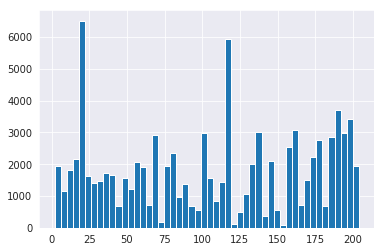

In [20]:
train['hospital_id'].hist(bins=50)

two distinct hospital around 23-24 and 110-115 are different from others, lets explore in the latter part; what makes this two hospital having having more patient from other hospital, question? most of there operation does it leads to excess hospital death or less or none

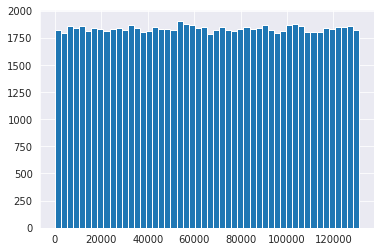

In [21]:
train['patient_id'].hist(bins=50)

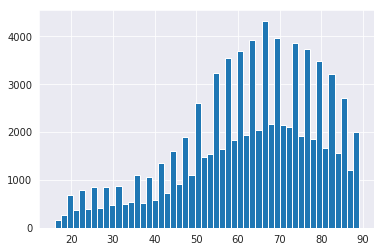

In [22]:
train['age'].hist(bins=50)

patient age between 50-90 visited the hospital mostly and a bit skewness in the distribution, lets handle that an plot the age category to make trends clearer

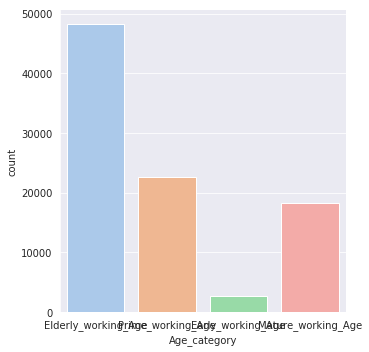

In [23]:
sns.catplot(x ='Age_category', kind ='count', palette='pastel', data = train);

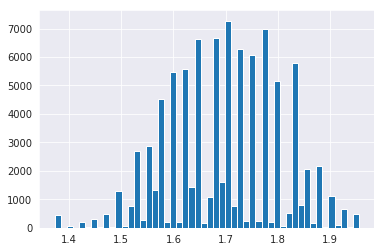

In [24]:
train['height'].hist(bins=50)

in bivariate analysis, we 'll explore whether tall people are likely to lead to hospital death or not

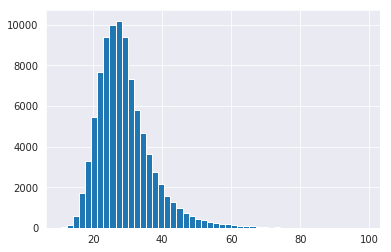

In [25]:
train['bmi'].hist(bins=50)

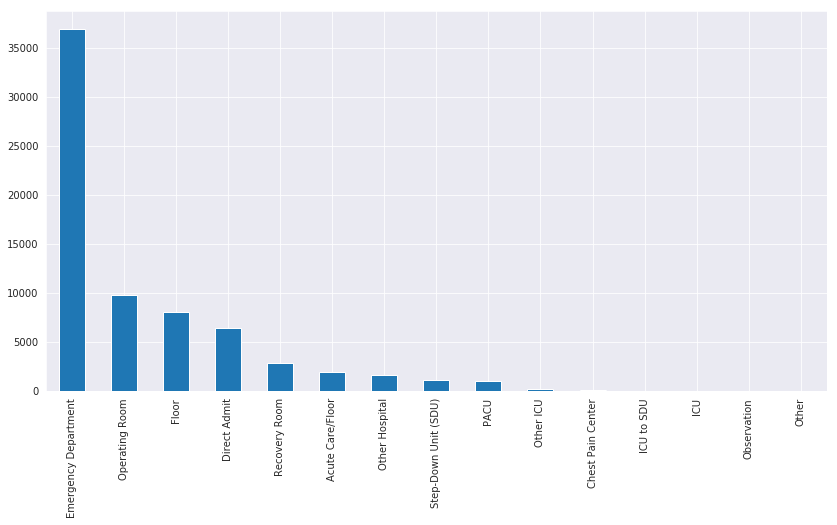

In [26]:
train['hospital_admit_source'].value_counts().plot(kind ='bar', figsize=[14,7])

more patient were admitted to emergy department which means there is high probability for such patient to die, if with elective surgery; there willbe an increase in probability

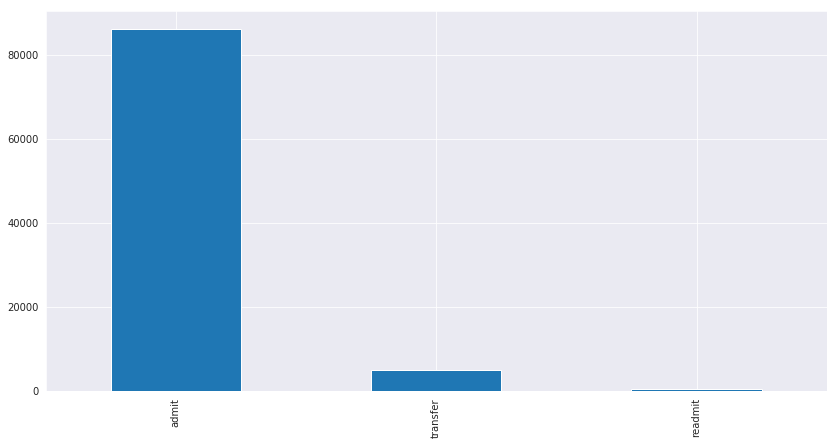

In [27]:
train['icu_stay_type'].value_counts().plot(kind ='bar', figsize=[14,7])

if patient was transfered then the state is critical, so in bivariate analysis, we will see more trends wrt some features

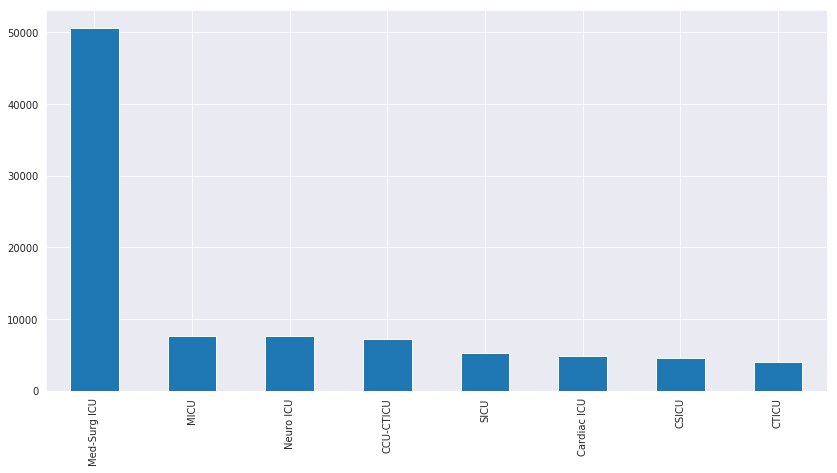

In [28]:
train['icu_type'].value_counts().plot(kind ='bar', figsize=[14,7])

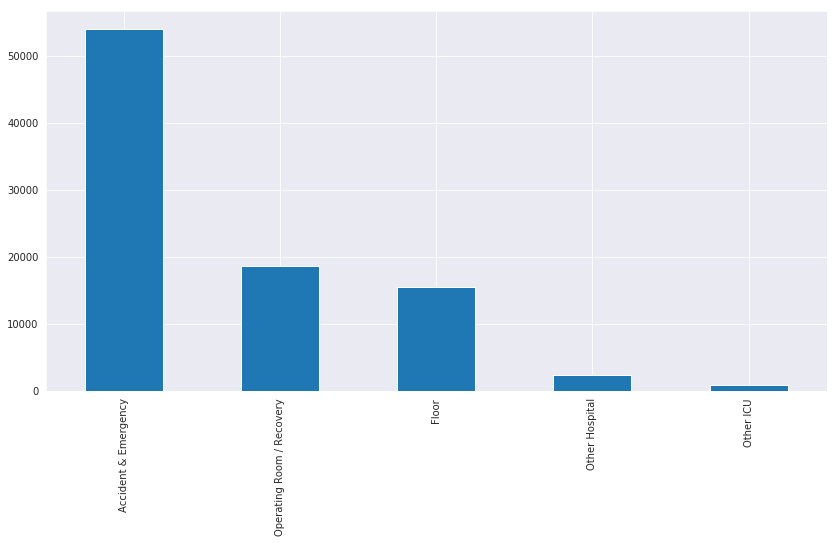

In [29]:
train['icu_admit_source'].value_counts().plot(kind ='bar', figsize=[14,7])

oops. fatal accident and emergency could be lead to hospital death and we have high rate of such

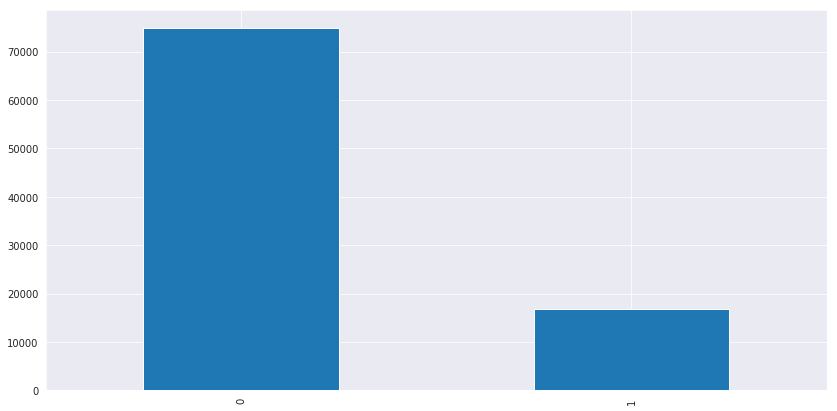

In [30]:
train['elective_surgery'].value_counts().plot(kind ='bar', figsize=[14,7])

#lesser patient opt in for elective surgery, lets check this wrt to hospital, numbers of times patient used the hospital, the patient death was it and elective surgery that leads to it or not

In [31]:


Yes = len(train[train.hospital_death ==1])
No = len(train[train.hospital_death ==0])
Total = len(train)
print ('There are imbalanace hospital death rate with a %i/%i ratio'%((No/Total*100), (Yes/Total*100)+1))


There are imbalanace hospital death rate with a 91/9 ratio


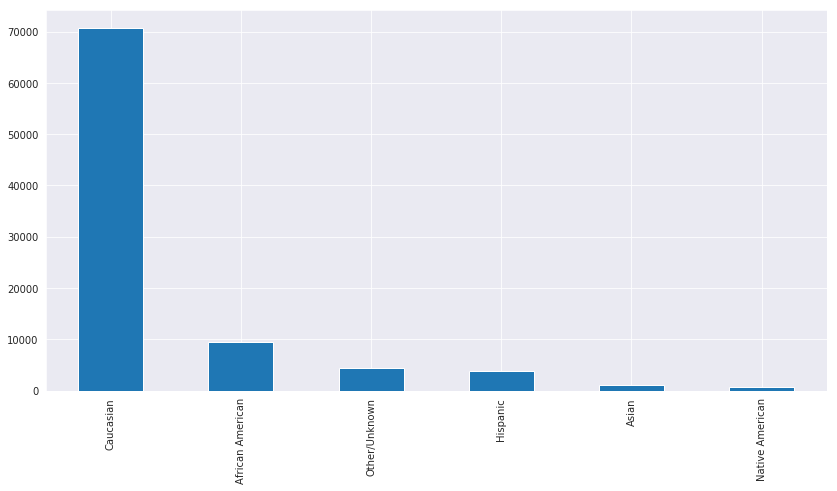

In [32]:
train['ethnicity'].value_counts().plot(kind ='bar', figsize=[14,7])

after doing bivariate analysis , check if features has influence with ethnicity but its less likely, reduce the values by merge some ethnicity together

In [33]:
train.fillna(-999, inplace =True)
test.fillna(-999, inplace =True)

In [34]:
train.hospital_death.value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

#lets use robost algorithm to handle th e imbalance data or reduce the highest value to range closer to the death(1) wrt other features not causing bias in modelling

In [35]:
encodeage = pd.get_dummies(train.Age_category)
encodeagex = pd.get_dummies(test.Age_category)
train = pd.concat([train, encodeage], axis ="columns")
test = pd.concat([test, encodeagex], axis ="columns")

In [36]:
encodeweight = pd.get_dummies(train.weight_class)
encodeweightx = pd.get_dummies(test.weight_class)

In [37]:
train = pd.concat([train, encodeweight], axis ="columns")
test = pd.concat([test, encodeweightx], axis ="columns")

In [38]:
train = train.drop(['calculated_bmi', 'very severely underweight','Early_working_Age'],axis=1)
test = test.drop(['calculated_bmi', 'very severely underweight','Early_working_Age'],axis=1)

In [39]:
train['patient_id'] =train['patient_id'].map(train['patient_id'].value_counts().to_dict())
test['patient_id'] =test['patient_id'].map(test['patient_id'].value_counts().to_dict())

In [40]:
train['hospital_id'] =train['hospital_id'].map(train['hospital_id'].value_counts().to_dict())
test['hospital_id'] =test['hospital_id'].map(test['hospital_id'].value_counts().to_dict())

In [41]:
train['gender'].value_counts()

M    49494
F    42219
Name: gender, dtype: int64

In [42]:
train['hospital_admit_source']=train['hospital_admit_source'].map(train['hospital_admit_source'].value_counts().to_dict())
test['hospital_admit_source']=test['hospital_admit_source'].map(test['hospital_admit_source'].value_counts().to_dict())

In [43]:
train['icu_admit_source']=train['icu_admit_source'].map(train['icu_admit_source'].value_counts().to_dict())
test['icu_admit_source']=test['icu_admit_source'].map(test['icu_admit_source'].value_counts().to_dict())

In [44]:
train['icu_id']=train['icu_id'].map(train['icu_id'].value_counts().to_dict())
test['icu_id']=test['icu_id'].map(test['icu_id'].value_counts().to_dict())

In [45]:
train['icu_type']=train['icu_type'].map(train['icu_type'].value_counts().to_dict())
test['icu_type']=test['icu_type'].map(test['icu_type'].value_counts().to_dict())

In [46]:
train['icu_stay_type']=train['icu_stay_type'].map(train['icu_stay_type'].value_counts().to_dict())
test['icu_stay_type']=test['icu_stay_type'].map(test['icu_stay_type'].value_counts().to_dict())

In [47]:
test.shape

(39308, 198)

In [48]:
x =train.drop(['encounter_id','hospital_death'], axis =1)
y =train.hospital_death

In [49]:
test=test.drop(['encounter_id','hospital_death'], axis =1)

In [50]:
test.shape

(39308, 196)

In [51]:
x.shape

(91713, 196)

In [52]:
from catboost import Pool, CatBoostClassifier, cv

In [53]:
cate_features_index=np.where(x.dtypes != float) [0]; cate_features_index

array([  0,   1,   4,   5,   6,   8,   9,  10,  11,  12,  14,  19, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195])

In [54]:
train =0.70
validate =0.15
testt =0.15

In [55]:
xtrain, xtest,ytrain,ytest= train_test_split(x,y, test_size=1-train)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size= testt/(testt+validate))

In [56]:
model =CatBoostClassifier(iterations =1500, depth=8, learning_rate=0.03, eval_metric ='AUC', use_best_model=True, random_seed=42)
model.fit(xtrain,ytrain,cate_features_index,eval_set=(xtest,ytest))

0:	test: 0.7954348	best: 0.7954348 (0)	total: 332ms	remaining: 8m 17s
1:	test: 0.8002797	best: 0.8002797 (1)	total: 574ms	remaining: 7m 10s
2:	test: 0.8097069	best: 0.8097069 (2)	total: 827ms	remaining: 6m 52s
3:	test: 0.8198868	best: 0.8198868 (3)	total: 1.04s	remaining: 6m 29s
4:	test: 0.8351168	best: 0.8351168 (4)	total: 1.27s	remaining: 6m 21s
5:	test: 0.8498241	best: 0.8498241 (5)	total: 1.51s	remaining: 6m 16s
6:	test: 0.8487150	best: 0.8498241 (5)	total: 1.74s	remaining: 6m 11s
7:	test: 0.8539844	best: 0.8539844 (7)	total: 1.99s	remaining: 6m 10s
8:	test: 0.8556162	best: 0.8556162 (8)	total: 2.23s	remaining: 6m 9s
9:	test: 0.8593649	best: 0.8593649 (9)	total: 2.47s	remaining: 6m 8s
10:	test: 0.8606225	best: 0.8606225 (10)	total: 2.71s	remaining: 6m 7s
11:	test: 0.8609200	best: 0.8609200 (11)	total: 2.96s	remaining: 6m 7s
12:	test: 0.8602127	best: 0.8609200 (11)	total: 3.2s	remaining: 6m 5s
13:	test: 0.8623436	best: 0.8623436 (13)	total: 3.45s	remaining: 6m 5s
14:	test: 0.8625818

In [57]:
test.dtypes

patient_id                         int64
hospital_id                        int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source              int64
icu_admit_source                   int64
icu_id                             int64
icu_stay_type                      int64
icu_type                           int64
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache                       float64
creatinine_apache                float64
fio2_apache     

In [58]:
pred = model.predict_proba(test)[:,1]

In [59]:
testx= pd.read_csv('/kaggle/input/widsdatathon2020/unlabeled.csv')

In [60]:
testx.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating 

In [61]:
xfinal =pd.DataFrame({'encounter_id': testx['encounter_id']})
yfinal = pd.DataFrame ({'hospital_death' :pred})

In [62]:
submission =pd.concat([xfinal, yfinal], axis ='columns')
submission.head()

,encounter_id,hospital_death
0,2,0.011236
1,5,0.018192
2,7,0.028224
3,8,0.147622
4,10,0.479268


In [63]:
submission.to_csv('tboostx.csv', index =False)